In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA

In [70]:
df = pd.read_csv('moviesDs.csv')
df

,id,title,budget,revenue,runtime,year,genre,certification_US,vote_average,vote_count,country
0,651,M*A*S*H,3500000,81600000,116.0,1970.0,Comedy,R,7.0,352,United States of America
1,11202,Patton,12000000,89800000,172.0,1970.0,Drama,PG,7.4,460,United States of America
2,11165,Tora! Tora! Tora!,25485000,29548291,144.0,1970.0,Drama,G,7.0,199,Japan
3,42345,The Molly Maguires,11000000,2200000,124.0,1970.0,Drama,PG,5.9,24,United States of America
4,33157,Waterloo,25000000,3052000,128.0,1970.0,History,NR,7.3,49,Italy
...,...,...,...,...,...,...,...,...,...,...,...
5122,474395,Teen Titans Go! To the Movies,10000000,28646544,84.0,2018.0,Family,PG,7.0,139,United States of America
5123,493551,Operation Finale,24000000,17506878,124.0,2018.0,Drama,PG-13,6.5,140,United States of America
5124,484247,A Simple Favor,20000000,87054892,117.0,2018.0,Thriller,R,6.5,363,United States of America
5125,220882,London Fields,8000000,116470,118.0,2018.0,Crime,R,5.9,16,United Kingdom


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5127 entries, 0 to 5126
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5127 non-null   int64  
 1   title             5127 non-null   object 
 2   budget            5127 non-null   int64  
 3   revenue           5127 non-null   int64  
 4   runtime           5127 non-null   float64
 5   year              5127 non-null   float64
 6   genre             5121 non-null   object 
 7   certification_US  5127 non-null   object 
 8   vote_average      5127 non-null   float64
 9   vote_count        5127 non-null   int64  
 10  country           5127 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 440.7+ KB


In [72]:
df.head()

,id,title,budget,revenue,runtime,year,genre,certification_US,vote_average,vote_count,country
0,651,M*A*S*H,3500000,81600000,116.0,1970.0,Comedy,R,7.0,352,United States of America
1,11202,Patton,12000000,89800000,172.0,1970.0,Drama,PG,7.4,460,United States of America
2,11165,Tora! Tora! Tora!,25485000,29548291,144.0,1970.0,Drama,G,7.0,199,Japan
3,42345,The Molly Maguires,11000000,2200000,124.0,1970.0,Drama,PG,5.9,24,United States of America
4,33157,Waterloo,25000000,3052000,128.0,1970.0,History,NR,7.3,49,Italy


<AxesSubplot:xlabel='budget', ylabel='revenue'>

<Figure size 1080x648 with 0 Axes>

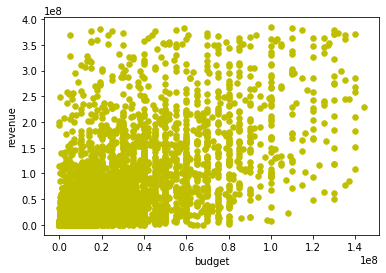

In [73]:
plt.figure(figsize = (15,9))
df.plot.scatter(x='budget', y= 'revenue', s=30, c= 'y')

In [74]:
for index, row in df.iterrows():
    try:
        budget = df.at[index, 'budget']
        revenue = df.at[index, 'revenue']
        vote_average = df.at[index, 'vote_average']
        if (revenue >= budget * 2)& (vote_average>5):
            success = 1
        else:
            success = 0
    except:     # if budget or revenue is empty
        success = np.nan

    df.at[index, 'success'] = success

In [75]:
ds = df.sort_values(by = 'vote_average')

In [76]:
ds.head()

,id,title,budget,revenue,runtime,year,genre,certification_US,vote_average,vote_count,country,success
4437,330878,"Kidnapping, Caucasian Style",3500000,179000,95.0,2014.0,Romance,NR,1.5,9,Russia,0.0
4315,295884,Saving Christmas,500000,2800000,79.0,2014.0,Comedy,PG,1.6,34,United States of America,0.0
3962,116977,Foodfight!,65000000,73706,87.0,2012.0,Animation,PG,2.1,35,United States of America,0.0
4383,272610,Black Rose,7000000,855450,83.0,2014.0,Drama,NR,2.3,9,Russia,0.0
2994,19623,Drona,15000000,3250000,150.0,2008.0,Action,NR,2.6,9,India,0.0


In [77]:
 ds["country"].value_counts()

United States of America    3164
United Kingdom               353
India                        269
France                       227
Canada                       208
Germany                      176
Australia                     97
Russia                        87
Japan                         65
Spain                         53
China                         50
Italy                         49
Belgium                       30
Hong Kong                     29
South Korea                   29
Ireland                       28
Denmark                       24
Mexico                        24
New Zealand                   15
Netherlands                   14
Sweden                        13
Czech Republic                12
Brazil                        11
Argentina                     10
Finland                        9
Turkey                         9
United Arab Emirates           8
Norway                         8
Switzerland                    8
South Africa                   7
Austria   

In [78]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5127 entries, 4437 to 4928
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5127 non-null   int64  
 1   title             5127 non-null   object 
 2   budget            5127 non-null   int64  
 3   revenue           5127 non-null   int64  
 4   runtime           5127 non-null   float64
 5   year              5127 non-null   float64
 6   genre             5121 non-null   object 
 7   certification_US  5127 non-null   object 
 8   vote_average      5127 non-null   float64
 9   vote_count        5127 non-null   int64  
 10  country           5127 non-null   object 
 11  success           5127 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 520.7+ KB


In [79]:
x=ds.drop(['id','title','success'], axis=1)

In [80]:
y=ds['success']

In [81]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5127 entries, 4437 to 4928
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   budget            5127 non-null   int64  
 1   revenue           5127 non-null   int64  
 2   runtime           5127 non-null   float64
 3   year              5127 non-null   float64
 4   genre             5121 non-null   object 
 5   certification_US  5127 non-null   object 
 6   vote_average      5127 non-null   float64
 7   vote_count        5127 non-null   int64  
 8   country           5127 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 400.5+ KB


In [82]:
y.name

'success'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='budget', ylabel='revenue'>

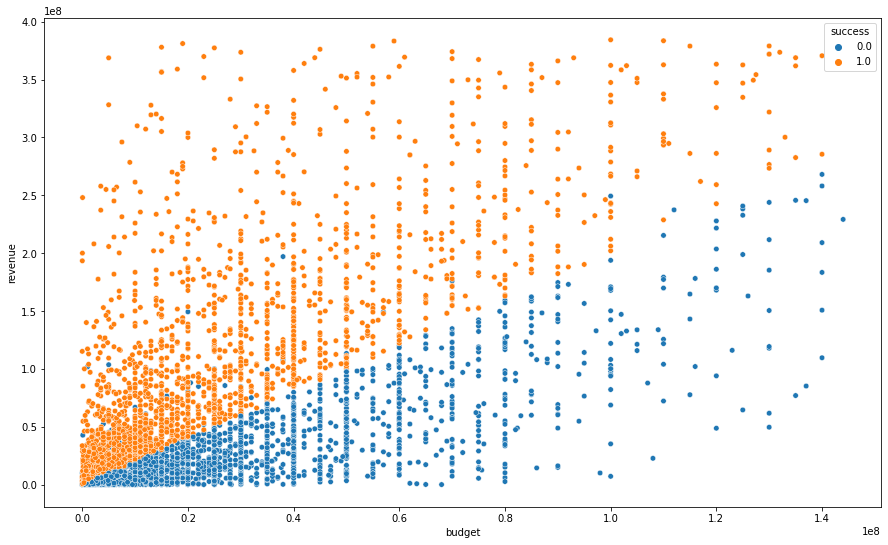

In [83]:
plt.figure(figsize = (15,9))
x_axis = ds['budget']
y_axis = ds['revenue']
sns.scatterplot(x_axis, y_axis, hue =ds['success'], s=30, cmap= 'rainbow')

In [84]:
genre = LabelEncoder()
x['genre1'] = genre.fit_transform(x['genre'])
x = x.drop(['genre'],axis=1)

country = LabelEncoder()
x['country1'] = country.fit_transform(x['country'])
x = x.drop(['country'],axis=1)

certification_US = LabelEncoder()
x['certification_US1'] = certification_US.fit_transform(x['certification_US'])
x = x.drop(['certification_US'],axis=1)
x

,budget,revenue,runtime,year,vote_average,vote_count,genre1,country1,certification_US1
4437,3500000,179000,95.0,2014.0,1.5,9,13,25,2
4315,500000,2800000,79.0,2014.0,1.6,34,3,36,3
3962,65000000,73706,87.0,2012.0,2.1,35,2,36,3
4383,7000000,855450,83.0,2014.0,2.3,9,6,25,2
2994,15000000,3250000,150.0,2008.0,2.6,9,0,14,2
...,...,...,...,...,...,...,...,...,...
44,6000000,245066411,175.0,1972.0,8.6,8784,6,36,5
2204,10000000,4069090,125.0,2003.0,8.6,17,6,5,4
352,1200000,4978922,88.0,1984.0,8.6,67,5,36,2
1096,25000000,28341469,142.0,1994.0,8.6,11498,6,36,5


In [113]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
k_range = range(1,15)
scores = {}

scores_list = []


In [114]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))


Text(0, 0.5, 'Testing Accuracy')

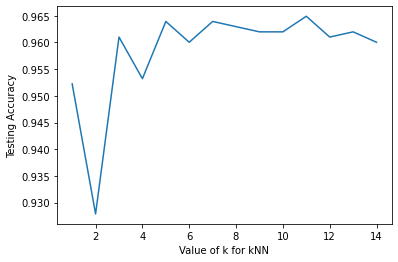

In [115]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of k for kNN')
plt.ylabel('Testing Accuracy')

In [88]:
max_value = max(scores_list)
max_value

0.9649122807017544

In [116]:
scores[11]

0.9649122807017544

In [90]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=8)

In [91]:
ds.country.unique()

array(['Russia', 'United States of America', 'India', 'Australia',
       'Canada', 'Germany', 'Spain', 'United Kingdom', 'Switzerland',
       'South Korea', 'Czech Republic', 'Italy', 'Netherlands', 'Japan',
       'Sweden', 'Belgium', 'France', 'United Arab Emirates', 'Argentina',
       'Thailand', 'Ireland', 'Brazil', 'New Zealand', 'South Africa',
       'Finland', 'Romania', 'Hong Kong', 'Mexico', 'China', 'Norway',
       'Philippines', 'Denmark', 'Hungary', 'Austria', 'Singapore',
       'Turkey', 'Israel'], dtype=object)

In [92]:
ds.certification_US.unique()

array(['NR', 'PG', 'R', 'PG-13', 'G', 'NC-17'], dtype=object)

In [93]:
ds.genre.unique()

array(['Romance', 'Comedy', 'Animation', 'Drama', 'Action', 'Documentary',
       'Thriller', nan, 'Horror', 'Crime', 'Adventure', 'Science Fiction',
       'Fantasy', 'Mystery', 'Family', 'Music', 'Western', 'War',
       'TV Movie', 'History'], dtype=object)

In [94]:
# Pick from 'Russia', 'United States of America', 'India', 'Australia',
       #'Canada', 'Germany', 'Spain', 'United Kingdom', 'Switzerland',
       #'South Korea', 'Czech Republic', 'Italy', 'Netherlands', 'Japan',
       #'Sweden', 'Belgium', 'France', 'United Arab Emirates', 'Argentina',
       #'Thailand', 'Ireland', 'Brazil', 'New Zealand', 'South Africa',
       #'Finland', 'Romania', 'Hong Kong', 'Mexico', 'China', 'Norway',
       #'Philippines', 'Denmark', 'Hungary', 'Austria', 'Singapore',
       #'Turkey', 'Israel'
country.transform(['France'])

array([10])

In [95]:
#Pick from 'NR', 'PG', 'R', 'PG-13', 'G', 'NC-17'
certification_US.transform(['NR'])

array([2])

In [96]:
# Pick from 'Romance', 'Comedy', 'Animation', 'Drama', 'Action', 'Documentary',
       #'Thriller', nan, 'Horror', 'Crime', 'Adventure', 'Science Fiction',
       #'Fantasy', 'Mystery', 'Family', 'Music', 'Western', 'War',
       #'TV Movie', 'History'
genre.transform(['Comedy'])

array([3])

In [97]:

dtf= pd.read_csv('tstset.csv')

x_test = dtf.drop(['id','title'],axis=1)
genre = LabelEncoder()
x_test['genre1'] = genre.fit_transform(x_test['genre'])
x_test = x_test.drop(['genre'],axis=1)

country = LabelEncoder()
x_test['country1'] = country.fit_transform(x_test['country'])
x_test = x_test.drop(['country'],axis=1)

certification_US = LabelEncoder()
x_test['certification_US1'] = certification_US.fit_transform(x_test['certification_US'])
x_test = x_test.drop(['certification_US'],axis=1)
x_test

,budget,revenue,runtime,year,vote_average,vote_count,genre1,country1,certification_US1
0,3598902,4001919,108,2018,6.7,137,0,0,1
1,10000000,28646544,84,2018,7.0,139,3,2,0
2,24000000,17506878,124,2018,6.5,140,2,2,1
3,20000000,87054892,117,2018,6.5,363,5,2,2
4,8000000,116470,118,2018,5.9,16,1,1,2
5,5000000,470901,100,2018,5.1,30,1,1,2
6,5000000,10000000,99,2018,4.2,25,4,1,2


In [98]:
y_predict = knn.predict(x_test)
result = pd.concat([dtf, pd.DataFrame(y_predict)], axis = 1)
result.columns.values[-1:] = ['success']

In [99]:
result

,id,title,budget,revenue,runtime,year,genre,certification_US,vote_average,vote_count,country,success
0,1,Bleach,3598902,4001919,108,2018,Action,PG-13,6.7,137,Japan,0.0
1,2,Teen Titans Go! To the Movies,10000000,28646544,84,2018,Family,PG,7.0,139,United States of America,1.0
2,3,Operation Finale,24000000,17506878,124,2018,Drama,PG-13,6.5,140,United States of America,0.0
3,4,A Simple Favor,20000000,87054892,117,2018,Thriller,R,6.5,363,United States of America,1.0
4,5,London Fields,8000000,116470,118,2018,Crime,R,5.9,16,United Kingdom,0.0
5,6,Mara,5000000,470901,100,2018,Crime,R,5.1,30,United Kingdom,0.0
6,7,Random1,5000000,10000000,99,2018,Random,R,4.2,25,United Kingdom,0.0
